In [5]:
import pickle
import torch
import os
import sys

sys.path.append('../')

from models.timegan import TimeGAN
from models.utils import rescale


In [6]:
path="/home/rzhou/Projects/timegan-pytorch/output/inD_18-29_multi_Epoch10000_withoutZfilter_min_G_Loss_1000periodic"
with open(f"{path}/args.pickle", "rb") as fb:
    args = torch.load(fb)
with open(f"{path}/fake_time.pickle", "rb") as fb:
    fake_time = pickle.load(fb)
print(args)

fake_time = torch.tensor(fake_time, dtype=torch.float32)
print(fake_time)
print(len(fake_time)) 

Namespace(device='cuda', exp='inD_18-29_multi_Epoch10000_withoutZfilter_min_G_Loss_1000periodic', is_train=True, seed=42, feat_pred_no=1, max_seq_len=100, train_rate=0.5, scaling_method='minmax', emb_epochs=10000, sup_epochs=10000, gan_epochs=10000, batch_size=128, hidden_dim=20, num_layers=3, dis_thresh=0.15, optimizer='adam', learning_rate=0.001, model_path='/home/rzhou/Projects/timegan-pytorch/output/inD_18-29_multi_Epoch10000_withoutZfilter_min_G_Loss_1000periodic', padding_value=-10.0, feature_dim=10, Z_dim=10)
tensor([100., 100., 100.,  ..., 100., 100., 100.])
1429


In [8]:
from data.data_preprocess import data_preprocess
#data_path="/DATA1/rzhou/ika/multi_testcases/inD_multi_full.csv"
data_path="/DATA1/rzhou/ika/multi_testcases/inD/ori/multi/inD_multi_18-29_seq100_nfea10.csv"

X, T, params_rescale, args.max_seq_len, args.padding_value = data_preprocess(
    file_name=data_path, max_seq_len=args.max_seq_len,scaling_method=args.scaling_method
)

Loading data...



100%|██████████| 2858/2858 [00:02<00:00, 1060.26it/s]


In [9]:

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeGAN(args)
model_path = "/home/rzhou/Projects/timegan-pytorch/output/inD_18-29_seq100_nfea10_Epoch10000_1000periodic/min_G_loss_model_epoch_8000.pt"
model.load_state_dict(torch.load(model_path))
model.to(args.device)
model.eval()
with torch.no_grad():
    # Generate fake data
    Z = torch.rand((len(fake_time), args.max_seq_len, args.Z_dim))
    generated_data = model(X=None, T=fake_time, Z=Z, obj="inference").numpy()

In [11]:
print(generated_data[0][:,5])

[0.9318069  0.8431083  0.75413465 0.6498521  0.5657633  0.5525831
 0.64029443 0.610517   0.53019917 0.619058   0.5351496  0.48461738
 0.60675645 0.47746417 0.43499655 0.6187978  0.48206702 0.42294845
 0.5717486  0.46828106 0.42782107 0.58586156 0.44786212 0.42631695
 0.5745333  0.44046718 0.4221309  0.57718396 0.4307822  0.42350587
 0.5696805  0.42267898 0.42039487 0.57135075 0.41702178 0.41883206
 0.5656829  0.412136   0.4149984  0.5646533  0.40875432 0.412229
 0.56195104 0.4059982  0.40851888 0.5584111  0.4048301  0.40788475
 0.55847514 0.4015629  0.4054752  0.5534303  0.40074188 0.40161118
 0.55197865 0.40084887 0.4007271  0.54919577 0.39880908 0.39714676
 0.54767    0.40034318 0.39563033 0.54472804 0.39783365 0.39265448
 0.54370606 0.3988733  0.3920688  0.5412066  0.3984211  0.38935533
 0.5395214  0.39765713 0.3885341  0.53741765 0.39908165 0.3874573
 0.5357724  0.39803964 0.38622034 0.5338178  0.3991493  0.3865114
 0.5320357  0.39808705 0.3836429  0.5310252  0.39940488 0.38259396


In [12]:
rescaled_generated_data=rescale(generated_data,args.scaling_method,params_rescale)
print(rescaled_generated_data[0][:,1])

[-30.672613 -28.747541 -32.155144 -30.349182 -26.584133 -27.458933
 -18.246029 -31.137447 -28.872118 -15.056194 -36.225677 -31.510483
 -13.811634 -41.89364  -34.642075 -14.165871 -43.137432 -32.725227
 -13.727192 -41.74697  -33.53733  -14.218849 -43.67791  -34.207443
 -14.61644  -43.331337 -34.498535 -14.910946 -43.90849  -34.83629
 -15.174583 -43.842484 -35.18657  -15.41658  -44.140907 -35.278427
 -15.55452  -44.13134  -35.524612 -15.754086 -44.156025 -35.572697
 -15.819244 -44.29811  -35.757988 -15.973049 -44.02782  -35.691586
 -15.957165 -44.351364 -35.82261  -16.17971  -43.95887  -35.53785
 -16.062237 -44.114956 -35.70878  -16.21434  -43.955967 -35.527252
 -16.256348 -43.873993 -35.437325 -16.232124 -43.850853 -35.429897
 -16.352802 -43.693127 -35.231606 -16.363209 -43.670837 -35.180363
 -16.349804 -43.607887 -35.09279  -16.452412 -43.398037 -34.885567
 -16.452385 -43.440136 -34.81991  -16.514801 -43.09653  -34.611862
 -16.527355 -43.272537 -34.439697 -16.556019 -42.96499  -34.2777

In [13]:
rescaled_generated_data.shape

(1429, 100, 10)

: 

310


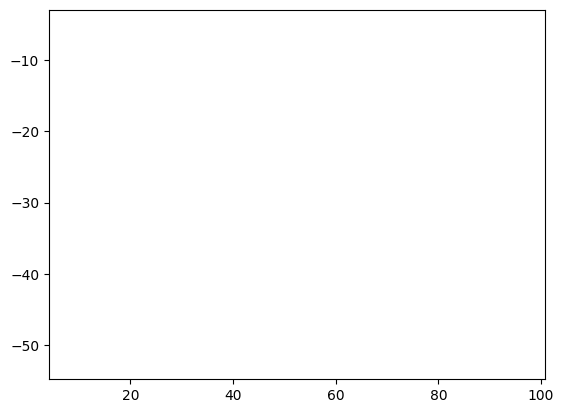

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 假定rescaled_generated_data为(1773, 100, 10)的NumPy数组

# 选择一个随机案例
case_index = np.random.randint(0, rescaled_generated_data.shape[0])
print(case_index)
case_data = rescaled_generated_data[case_index]

frames_per_second = 25
total_seconds_per_case = 4
frames_per_case = frames_per_second * total_seconds_per_case

fig, ax = plt.subplots()
x_min, x_max = np.min(rescaled_generated_data[..., ::2]), np.max(rescaled_generated_data[..., ::2])
y_min, y_max = np.min(rescaled_generated_data[..., 1::2]), np.max(rescaled_generated_data[..., 1::2])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

points = [ax.plot([], [], 'o', label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for point in points:
        point.set_data([], [])
    return points

def update(frame):
    for i, point in enumerate(points):
        x = case_data[frame, i*2]
        y = case_data[frame, i*2 + 1]
        point.set_data(x, y)
    return points

ani = animation.FuncAnimation(fig, update, frames=frames_per_case, init_func=init, blit=True, repeat=True)

plt.show()

# 注意：由于当前环境限制，实际保存动画需在你的本地环境执行
ani.save('trajectory_animation.mp4', fps=frames_per_second, extra_args=['-vcodec', 'libx264'])
